## Euler's method

We look at numerically solving differential equations. Most scientific software packages already include a wide variety of numerical integrators. Here we'll write our own simple version and compare it to the built in solutions.

Again we're considering a second order mass, spring, damper system.

\begin{align}
    m \ddot{x} + c \dot{x} + k x = f(t)
\end{align}

Now the input is a periodic function:

\begin{align}
    f(t) &= \cos t 
\end{align}

### Import Python packages

Again we import our Python packages.

In [14]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt

params = {
    'lines.linewidth': 3,
    'axes.labelsize': 16,
    'font.size': 16,
    'legend.fontsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': False,
    'figure.figsize': [8,6],
    'text.usetex': True,
    'text.latex.unicode': True,
    'text.latex.preamble': ['\\usepackage{siunitx}']
   }

mpl.rcParams.update(params)

### Define some functions

Here we define our input and the equations of motion of our system. 

We convert our single, second order system into two, first order systems:

\begin{align}
    \dot{x}_1 &= x_2, \\ 
    \dot{x}_2 &= \frac{f(t)}{m} - \frac{c}{m} x_2 - \frac{k}{m} x_1
\end{align}

An write this as a function. Just like MATLAB!!

In [3]:
def input(t):
    f = np.cos(t)
    return f

def msd(state, t, m, c, k):
    x, xd = state
    pos_dot = xd
    vel_dot = 1/m*(input(t) - c*xd - k*x)
    state_dot = [pos_dot, vel_dot]
    return state_dot

### Simulate the system

Now we define the initial conditions, system paramters, and call our ODE integrator. 

Also just like Matlab

In [4]:
num_steps = 100
tf = 10
t = np.linspace(0,tf,num_steps)
x0 = [0,0]

m = 2
c = 2
k = 1

sol_ode = odeint(msd, x0, t, args=(m, c, k))

### Let's write our own integrator

Here we use a simple first order Euler integration scheme.

In [5]:
sol_euler = np.zeros((num_steps,2))
delta_t = tf/(num_steps-1)
sol_euler[0,:] = x0

for ii in range(num_steps-1):
    sol_euler[ii+1,0] = sol_euler[ii,0] + sol_euler[ii,1]*delta_t
    
    a = 1/m*(input(t[ii])-c*sol_euler[ii,1] - k*sol_euler[ii,0])
    
    sol_euler[ii+1,1] = sol_euler[ii,1]+a*delta_t
    

### Plot the results

Here we plots the results using `matplotlib`.

We also show some examples of modifying the output for **PUBLICATION QUALITY**

Just to note that the option `text.latex.preamble` is not officially supported and might break everything!

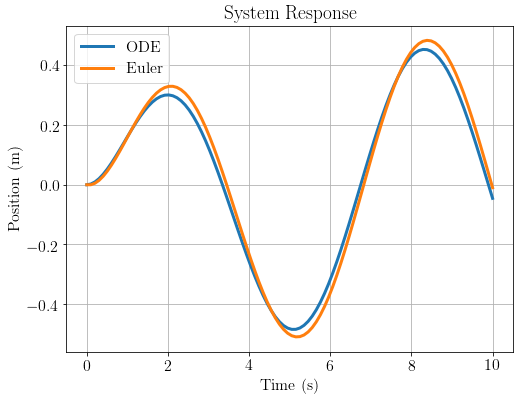

In [31]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

ax.plot(t,sol_ode[:,0],label='ODE')
ax.plot(t,sol_euler[:,0],label='Euler')
ax.set_xlabel(r'Time (\si{\second})')
ax.set_ylabel(r'Position (\si{\meter})')
ax.set_title(r'System Response')
ax.grid(True)
ax.legend()

# fig.savefig('response.eps')
plt.show()